## 필요한라이브러리 불러오기

In [319]:
# 데이터 분석을 위해 pandas
import pandas as pd

In [320]:
# 수치계산을 위해 numpy
import numpy as np

In [321]:
# 시각화를 위해 mapplotlib, seaborn를 불러온다.
import matplotlib.pyplot as plt
import seaborn as sns

### 시각화를 위한 한글 폰트 설정하기

In [322]:
# 한글 설정 & 마이너스 표시
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [323]:
# import matplotlib
# matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
# # matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac
# matplotlib.rcParams['font.size'] = 15 # 글자 크기
# matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결

In [324]:
# import matplotlib.font_manager as fm
# fm.fontManager.ttflist # 사용 가능한 폰트 확인
# [f.name for f in fm.fontManager.ttflist]

## 데이터 불러오기
- 한글 깨짐 방지
> encoding='cp949' or 'utf-8'

In [325]:
df = pd.read_csv('2_data.csv', encoding='cp949')

### EDA(Exploratory data analysis) 데이터 탐색

In [ ]:
# 데이터 미리보기
df.tail(3)

***

In [372]:
# 모든 컬럼 보이게 하기 설정
# pd.set_option('display.max_columns', None)
# 초기화
pd.reset_option('display.max_columns')

In [373]:
# 모든 열
pd.set_option('display.max_rows', 100)
#pd.reset_option('display.max_rows')

In [327]:
df.head(2)

,시설명,카테고리1,카테고리2,카테고리3,시도 명칭,시군구 명칭,법정읍면동명칭,리 명칭,번지,도로명 이름,...,입장(이용료)가격 정보,반려동물 동반 가능정보,반려동물 전용 정보,입장 가능 동물 크기,반려동물 제한사항,장소(실내) 여부,장소(실외)여부,기본 정보_장소설명,애견 동반 추가 요금,최종작성일
0,1004 약국,반려동물업,반려의료,동물약국,경기도,고양시 덕양구,동산동,NaN,352-1 번지,동세로,...,변동,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,동물약국,없음,2022-11-30
1,1004섬수석미술관,반려동물업,반려동반여행,미술관,전라남도,신안군,자은면,백산리,633-54 번지,자은서부2길,...,없음,동반불가,해당없음,해당없음,해당없음,실내 동반가능,실외 동반가능,미술관,없음,2022-11-30


In [ ]:
# 컬럼명 가져오기
df.columns

In [328]:
# 인덱스 가져오기
df.index

RangeIndex(start=0, stop=23929, step=1)

In [ ]:
# 데이터의 전체적인 정보를 볼 수 있다
# 데이터 컬럼명, 사이즈, 타입, 메모리 사용량, 결측치
df.info()
# 리 명칭이 결측치가 제일 많음

In [329]:
# 기술통계정보 보기 (디폴트는 수치타입의 컬럼정보만 가져와 분석)
df.describe() # 디폴트값 : (include=[np.number])
# df.describe(include="all") # 전체
# df.describe(include=[object]) # object 타입만

,위도,경도,우편번호
count,23929.000000,23929.000000,23857.000000
mean,36.644793,127.457427,27772.173911
std,1.094795,0.835214,18710.951714
min,33.207767,124.715938,1006.000000
25%,35.817568,126.891572,11928.000000
50%,37.250567,127.096204,22719.000000
75%,37.525708,127.950530,44710.000000
max,38.584080,130.904983,63644.000000


In [330]:
# 데이터의 크기
df.shape

(23929, 31)

### 결측치 보기

In [331]:
# 컬럼별 결측치 확인하기
# 결측치는 전체 데이터에 영향이 없으면 제거하고 필요한 경우는 다른값으로 대체
df.isnull().sum()

시설명                 0
카테고리1               0
카테고리2               0
카테고리3               0
시도 명칭               0
시군구 명칭            145
법정읍면동명칭            44
리 명칭            19134
번지                 57
도로명 이름            306
건물 번호             306
위도                  0
경도                  0
우편번호               72
도로명주소             306
지번주소                0
전화번호                0
홈페이지                0
휴무일                 0
운영시간                0
주차 가능여부             0
입장(이용료)가격 정보        0
반려동물 동반 가능정보        0
반려동물 전용 정보          0
입장 가능 동물 크기         0
반려동물 제한사항           0
장소(실내) 여부           0
장소(실외)여부            0
기본 정보_장소설명          0
애견 동반 추가 요금         0
최종작성일               0
dtype: int64

<Axes: >

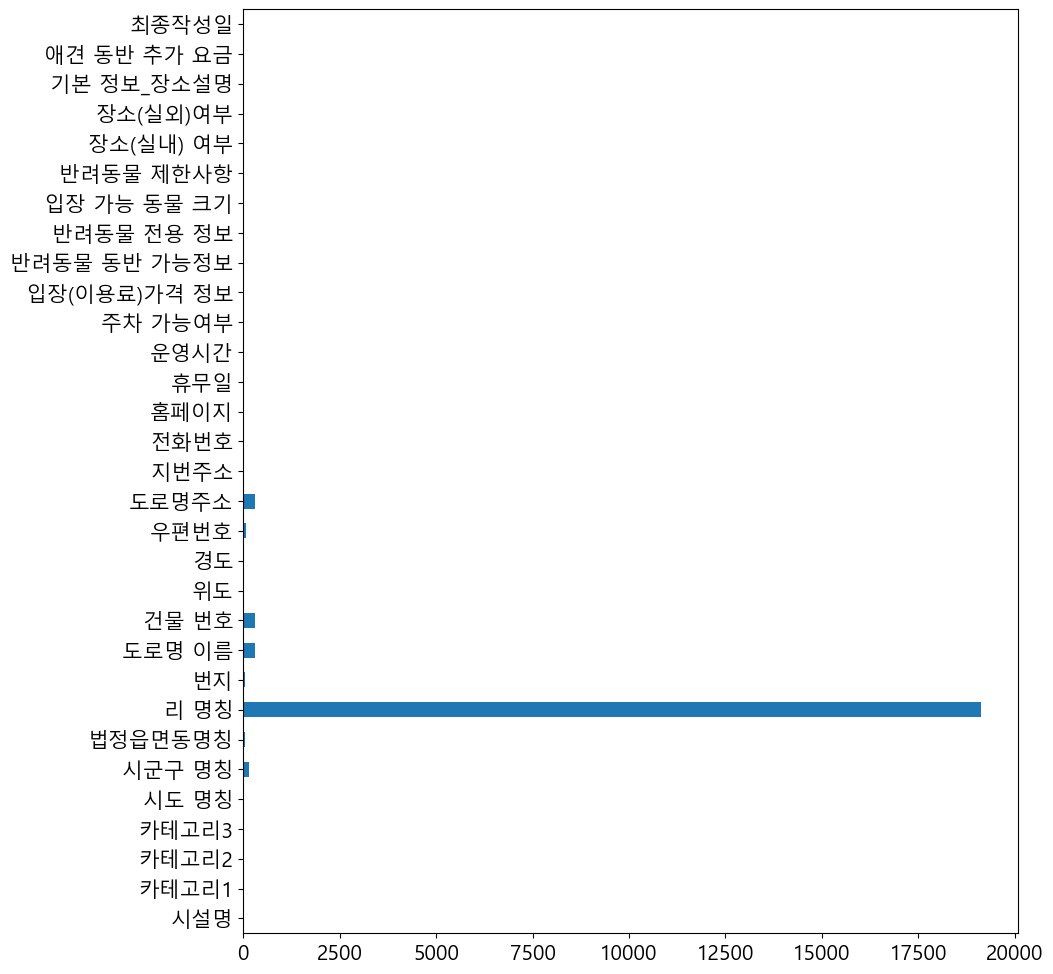

In [332]:
df.isnull().sum().plot.barh(figsize=(10, 12))

In [ ]:
df.columns

### 사용하지 않는 컬럼 제거하기

In [ ]:
# 필요한 컬럼만
columns = ['시설명', '카테고리2', '카테고리3', '시도 명칭', '운영시간', '주차 가능여부', '입장(이용료)가격 정보', '반려동물 동반 가능정보']
df = df[columns].copy()

In [333]:
df

,시설명,카테고리1,카테고리2,카테고리3,시도 명칭,시군구 명칭,법정읍면동명칭,리 명칭,번지,도로명 이름,...,입장(이용료)가격 정보,반려동물 동반 가능정보,반려동물 전용 정보,입장 가능 동물 크기,반려동물 제한사항,장소(실내) 여부,장소(실외)여부,기본 정보_장소설명,애견 동반 추가 요금,최종작성일
0,1004 약국,반려동물업,반려의료,동물약국,경기도,고양시 덕양구,동산동,NaN,352-1 번지,동세로,...,변동,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,동물약국,없음,2022-11-30
1,1004섬수석미술관,반려동물업,반려동반여행,미술관,전라남도,신안군,자은면,백산리,633-54 번지,자은서부2길,...,없음,동반불가,해당없음,해당없음,해당없음,실내 동반가능,실외 동반가능,미술관,없음,2022-11-30
2,100세건강약국,반려동물업,반려의료,동물약국,경기도,안양시 만안구,안양동,NaN,856-4 번지,안양로,...,변동,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,동물약국,없음,2022-11-30
3,100세약국,반려동물업,반려의료,동물약국,서울특별시,영등포구,당산2동,NaN,217-4 번지,양평로,...,변동,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,동물약국,없음,2022-11-30
4,100세약국,반려동물업,반려의료,동물약국,경기도,수원시 팔달구,인계동,NaN,942-4 번지,경수대로,...,변동,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,동물약국,없음,2022-11-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23924,y동물병원,반려동물업,반려의료,동물병원,대구광역시,수성구,시지동,NaN,258-14 번지,달구벌대로,...,변동,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,"일반동물병원, 일요일 야간 예약진료 가능",없음,2022-11-30
23925,YOLO오시개,반려동물업,반려동물식당카페,카페,부산광역시,사상구,주례동,NaN,60-55 번지,가야대로366번길,...,10000원,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반가능,"애견카페, 호텔","2,000~6,000원",2022-11-30
23926,YS유통,반려동물업,반려동물 서비스,반려동물용품,경기도,파주시,조리읍,장곡리,73-3 번지,장곡로,...,없음,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,"온라인쇼핑몰, 강아지용품, 반려동물 원목가구",없음,2022-11-30
23927,ZOO동물병원,반려동물업,반려의료,동물병원,서울특별시,성북구,정릉동,NaN,16-162 번지,정릉로,...,변동,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,일반동물병원,없음,2022-11-30


In [334]:
df.shape

(23929, 31)

### 범주형 데이터 분포 확인하기

In [335]:
df['카테고리3'].value_counts()

카테고리3
동물약국      8443
반려동물용품    5391
동물병원      4488
미용        2014
여행지        874
박물관        854
카페         809
펜션         464
미술관        262
문예회관       254
위탁관리        61
식당          14
호텔           1
Name: count, dtype: int64

<Axes: ylabel='카테고리3'>

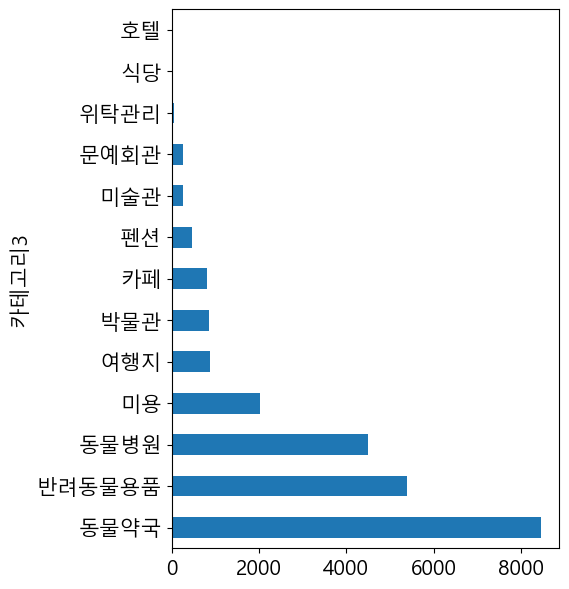

In [336]:
df['카테고리3'].value_counts().plot.barh(figsize=(5, 7))

In [ ]:
df['반려동물 동반 가능정보'].value_counts()

동반 가능한 곳만 데이터를 추려냄

In [337]:
df = df[df['반려동물 동반 가능정보'] == '동반가능']

In [338]:
df.shape

(21139, 31)

In [339]:
df['시도 명칭'].value_counts()

시도 명칭
경기도        5918
서울특별시      3915
부산광역시      1310
경상남도       1280
인천광역시      1229
경상북도        931
대구광역시       895
충청남도        839
전라북도        765
전라남도        719
강원도         689
대전광역시       576
충청북도        544
광주광역시       526
제주특별자치도     465
울산광역시       404
세종특별자치시     134
Name: count, dtype: int64

In [342]:
# 카테고리별 빈도
grouped = df.groupby(['카테고리2', '카테고리3']).size().reset_index(name='시설 갯수')
grouped

,카테고리2,카테고리3,시설 갯수
0,반려동물 서비스,미용,2004
1,반려동물 서비스,반려동물용품,3821
2,반려동물 서비스,위탁관리,61
3,반려동물식당카페,식당,14
4,반려동물식당카페,카페,793
5,반려동반여행,문예회관,4
6,반려동반여행,미술관,19
7,반려동반여행,박물관,215
8,반려동반여행,여행지,872
9,반려동반여행,카페,2


In [346]:
grouped['카테고리'] = grouped['카테고리2'] + '-' + grouped['카테고리3']
# 컬럼을 추가시킴

In [349]:
grouped

,카테고리2,카테고리3,시설 갯수,카테고리
0,반려동물 서비스,미용,2004,반려동물 서비스-미용
1,반려동물 서비스,반려동물용품,3821,반려동물 서비스-반려동물용품
2,반려동물 서비스,위탁관리,61,반려동물 서비스-위탁관리
3,반려동물식당카페,식당,14,반려동물식당카페-식당
4,반려동물식당카페,카페,793,반려동물식당카페-카페
5,반려동반여행,문예회관,4,반려동반여행-문예회관
6,반려동반여행,미술관,19,반려동반여행-미술관
7,반려동반여행,박물관,215,반려동반여행-박물관
8,반려동반여행,여행지,872,반려동반여행-여행지
9,반려동반여행,카페,2,반려동반여행-카페


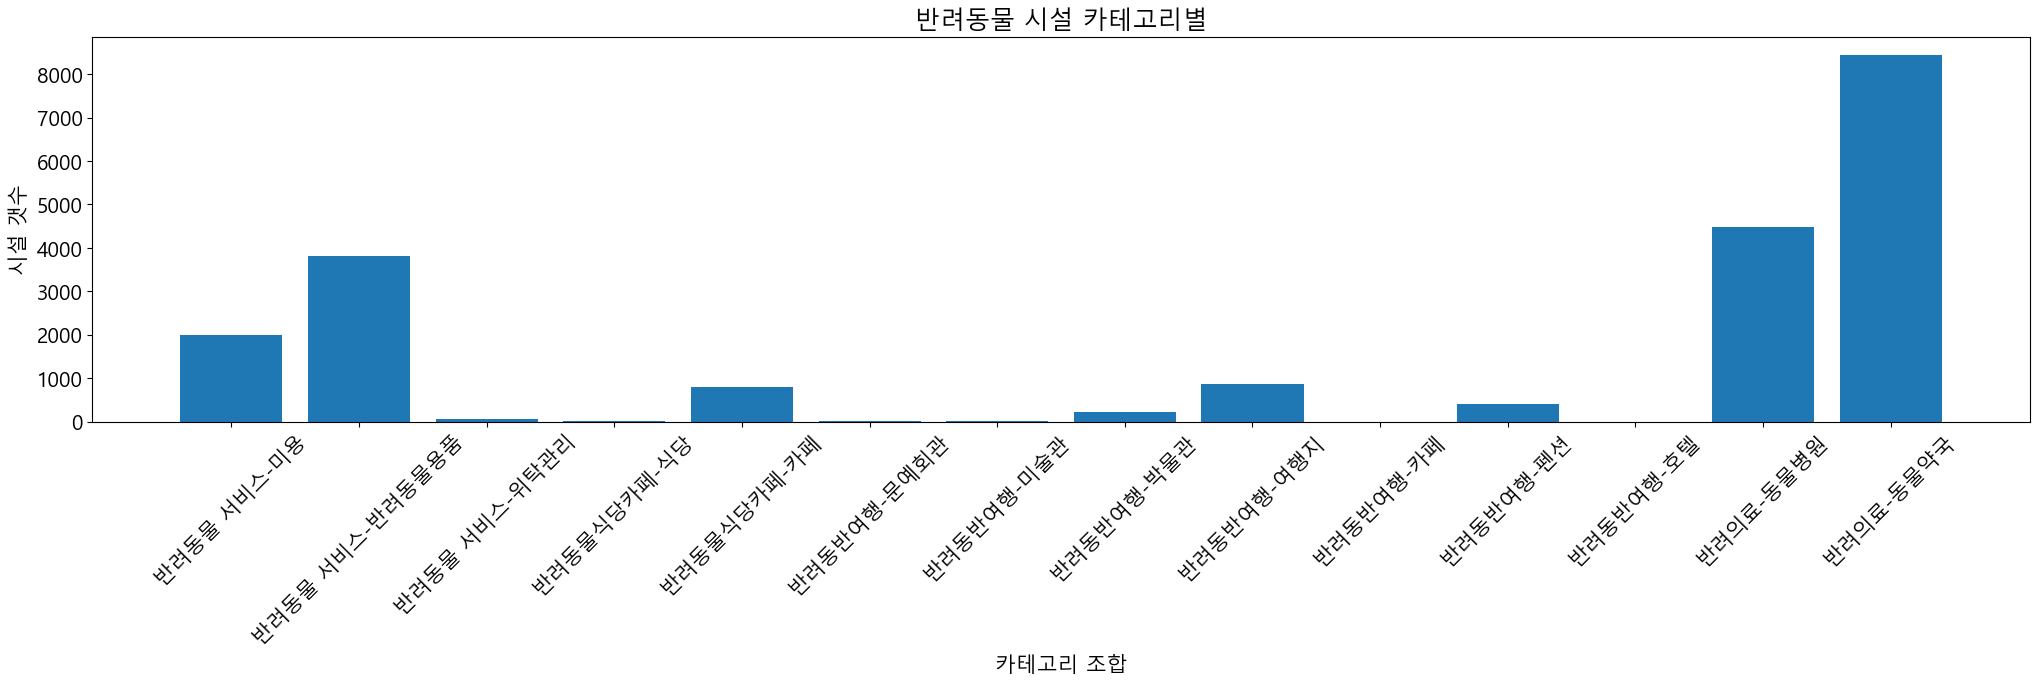

In [354]:
# 막대그래프 표현
plt.figure(figsize=(25,5))
plt.bar(grouped['카테고리'], grouped['시설 갯수'])
plt.xlabel('카테고리 조합')
plt.ylabel('시설 갯수')
plt.title('카테고리별 반려동물동반 가능한 시설갯수')
plt.xticks(rotation=45)
plt.show()

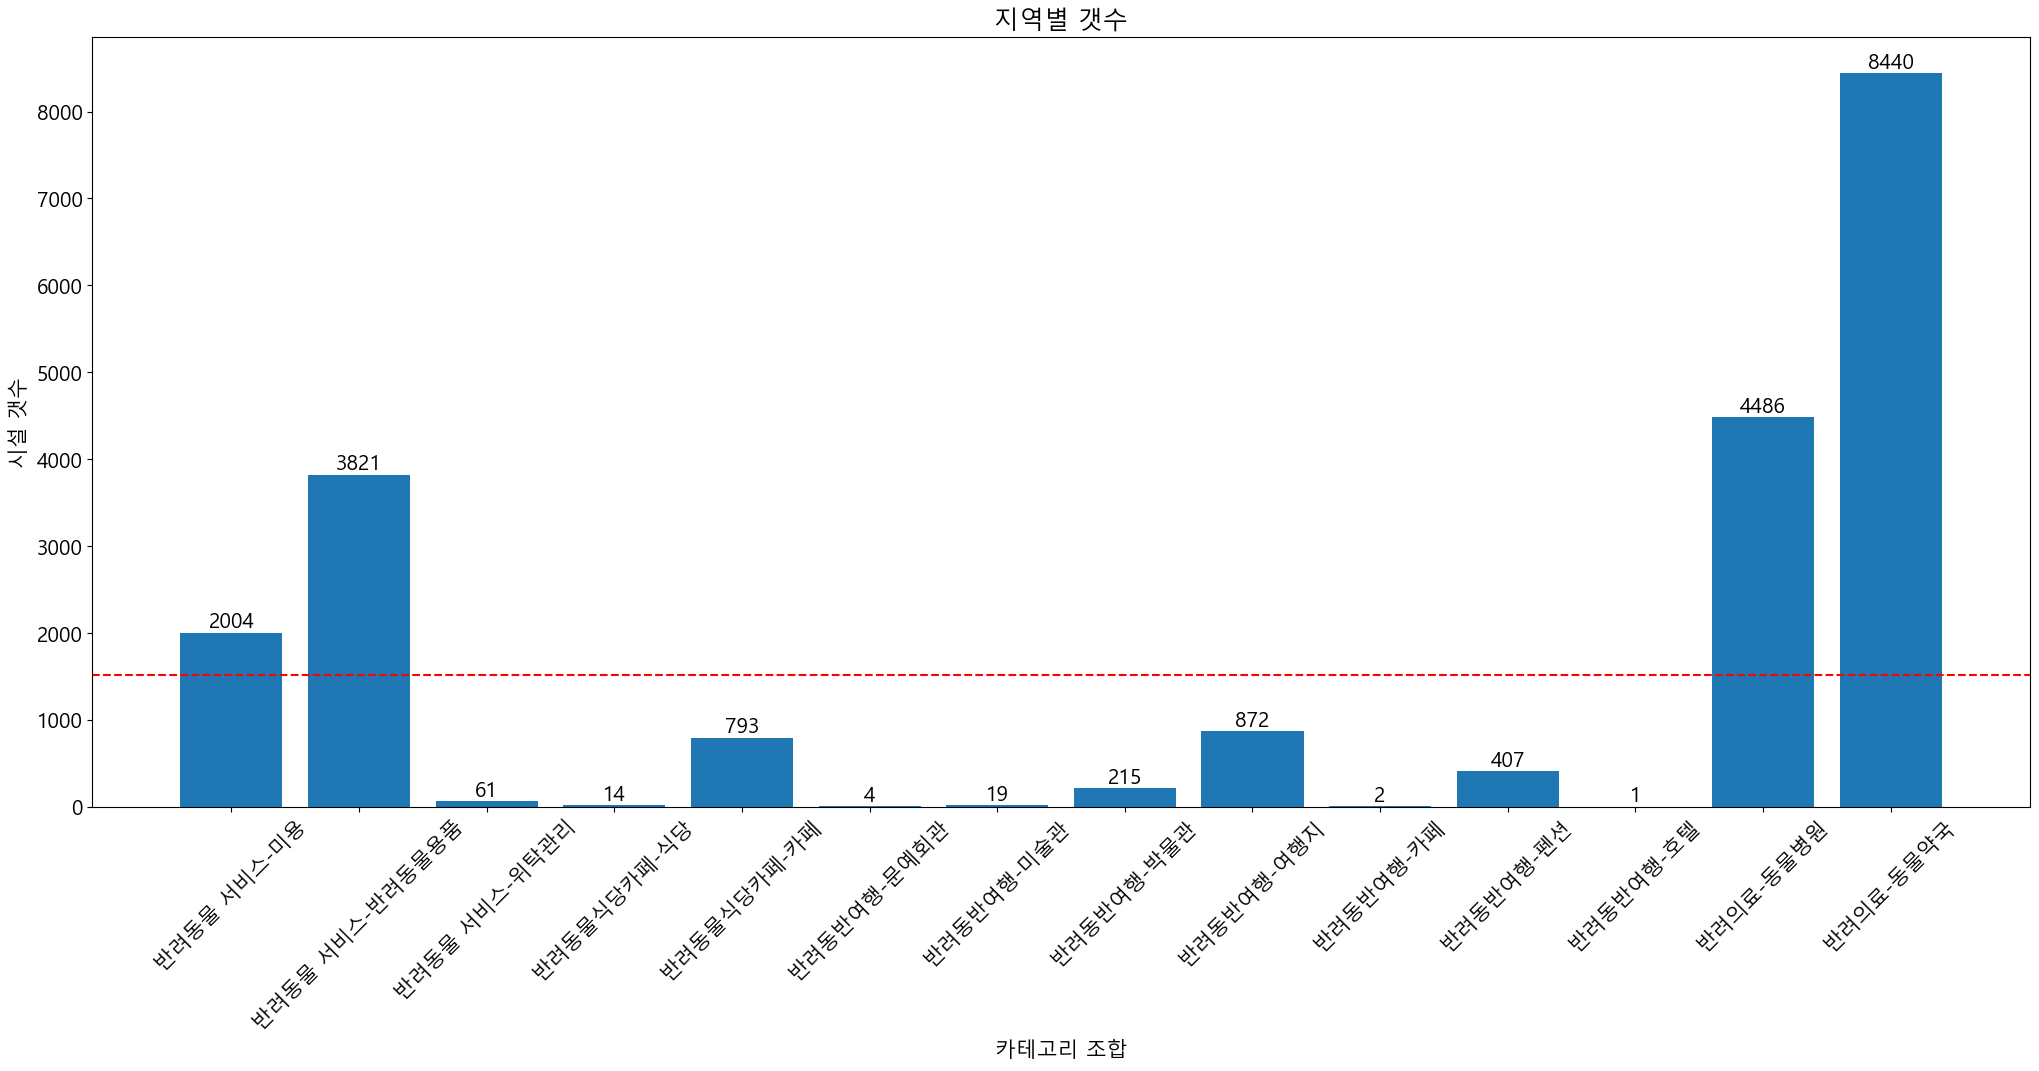

In [359]:
# 막대그래프 표현
plt.figure(figsize=(25,10))
bars = plt.bar(grouped['카테고리'], grouped['시설 갯수'])

# 빈도수 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')
    
# 평균선 추가
mean_value = grouped['시설 갯수'].mean()
plt.axhline(y=mean_value, color='r', linestyle='--', label=f'평균 : {mean_value:-2f}')
            
plt.xlabel('카테고리 조합')
plt.ylabel('시설 갯수')
plt.title('지역별 갯수')
plt.xticks(rotation=45)
plt.show()

In [366]:
df['입장(이용료)가격 정보'].value_counts()

입장(이용료)가격 정보
변동                                   16328
없음                                    4034
5000원                                   68
소형견 전체미용 35000원                         55
소형견 전체미용 30000원                         46
                                     ...  
소형견 클리핑 45000원 가위컷 60000원                1
3kg 미만 소형견 전체미용 35000원 가위컷 70000원        1
3kg 미만 소형견 전체미용 30000원 가위컷 40000원        1
8500원                                    1
5kg 이하 소형견 가위컷 70000원                    1
Name: count, Length: 179, dtype: int64